In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, invgamma, gamma
from scipy.linalg import sqrtm
from scipy.optimize import minimize
import pandas as pd
from tqdm import tqdm

# –û—Ü–µ–Ω–∫–∏ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –Ω–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–Ω

–ü—Ä–∏–º–µ—Ä (Haug, 2007, —Å. 203). –í—ã—á–∏—Å–ª–∏—Ç–µ –æ—Ü–µ–Ω–∫–∏ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –Ω–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –¥–ª—è
$\sigma_1=0.3$, $\sigma_2=0.4$, $b_1=0.05$,
$b_2=0.03$, $r=0.07$, $S_1=130$, $S_2=100$, $T=0.25, 0.5$, $\rho=\{-0.5, 0, 0.5\}$ –∏ $K=0.1, 0.2, \ldots, 1.0, 2.0, 3.0$, –±–µ–∑—Ä–∏—Å–∫–æ–≤–∞—è —Å—Ç–∞–≤–∫–∞ 7\%.

In [13]:
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 3.1, 0.1))

In [14]:
# –æ—Ü–µ–Ω–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª –Ω–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–Ω –¥–≤—É—Ö –∞–∫—Ç–∏–≤–æ–≤
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [15]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [16]:
pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T        0.25                              0.50                    
rho      -0.5       0.0           0.5      -0.5       0.0       0.5
K                                                                  
0.1  1.258176  1.237981  1.218087e+00  1.318772  1.276942  1.236349
0.2  1.159910  1.139716  1.119822e+00  1.222211  1.180382  1.139789
0.3  1.061645  1.041450  1.021556e+00  1.125658  1.083821  1.043228
0.4  0.963381  0.943185  9.232911e-01  1.029201  0.987271  0.946668
0.5  0.865142  0.844921  8.250259e-01  0.933227  0.890826  0.850109
0.6  0.767100  0.746686  7.267608e-01  0.838607  0.794886  0.753578
0.7  0.669880  0.648681  6.285021e-01  0.746640  0.700395  0.657273
0.8  0.574835  0.551674  5.303439e-01  0.658795  0.608852  0.561914
0.9  0.484000  0.457423  4.328959e-01  0.576419  0.522055  0.469130
1.0  0.399660  0.368638  3.382126e-01  0.500532  0.441702  0.381422
1.1  0.323794  0.288321  2.503546e-01  0.431749  0.369086  0.301586
1.2  0.257675  0.218872  1.743351e-01  0.370288  0.304936  0.231923
1.3  0.201735  0.161489  1.138825e-01  0.316041  0.249416  0.173677
1.4  0.155654  0.116063  6.986651e-02  0.268656  0.202224  0.126904
1.5  0.118577  0.081469  4.041277e-02  0.227624  0.162732  0.090696
1.6  0.089341  0.056007  2.215991e-02  0.192349  0.130120  0.063560
1.7  0.066683  0.037811  1.158871e-02  0.162202  0.103489  0.043788
1.8  0.049379  0.025132  5.814785e-03  0.136562  0.081946  0.029725
1.9  0.036324  0.016485  2.815324e-03  0.114840  0.064655  0.019926
2.0  0.026575  0.010692  1.322108e-03  0.096496  0.050866  0.013215
2.1  0.019356  0.006871  6.050017e-04  0.081041  0.039927  0.008687
2.2  0.014049  0.004381  2.708747e-04  0.068047  0.031287  0.005668
2.3  0.010168  0.002776  1.190836e-04  0.057135  0.024487  0.003676
2.4  0.007344  0.001750  5.156523e-05  0.047983  0.019148  0.002372
2.5  0.005296  0.001099  2.205238e-05  0.040310  0.014966  0.001525
2.6  0.003816  0.000688  9.336073e-06  0.033882  0.011695  0.000977
2.7  0.002747  0.000430  3.920709e-06  0.028496  0.009140  0.000625
2.8  0.001978  0.000268  1.636139e-06  0.023983  0.007145  0.000399
2.9  0.001424  0.000167  6.795067e-07  0.020201  0.005588  0.000254
3.0  0.001025  0.000104  2.812284e-07  0.017030  0.004374  0.000162

–ü—Ä–∏–º–µ—Ä. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –ø—É—Ç.

In [17]:
# –æ—Ü–µ–Ω–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª –Ω–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–Ω –¥–≤—É—Ö –∞–∫—Ç–∏–≤–æ–≤
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [18]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T            0.25                                      0.50                \
rho          -0.5           0.0           0.5          -0.5           0.0   
K                                                                           
0.1  3.778084e-20  6.901476e-28  1.250578e-49  5.123091e-12  4.854537e-16   
0.2  2.487462e-12  1.411677e-16  2.177139e-28  7.989515e-08  4.387780e-10   
0.3  9.205951e-09  1.827384e-11  6.814500e-19  7.344569e-06  2.454494e-07   
0.4  1.134986e-06  1.683099e-08  1.869670e-13  1.112457e-04  1.041540e-05   
0.5  2.695529e-05  1.424162e-06  5.708291e-10  6.978822e-04  1.261876e-04   
0.6  2.507371e-04  3.109487e-05  1.365790e-07  2.637833e-03  7.469382e-04   
0.7  1.295519e-03  2.910915e-04  6.678895e-06  7.231218e-03  2.815519e-03   
0.8  4.515951e-03  1.549517e-03  1.137204e-04  1.594718e-02  7.833919e-03   
0.9  1.194655e-02  5.564030e-03  9.309483e-04  3.013163e-02  1.759664e-02   
1.0  2.587163e-02  1.504463e-02  4.512810e-03  5.080542e-02  3.380455e-02   
1.1  4.827076e-02  3.299232e-02  1.492005e-02  7.858253e-02  5.774939e-02   
1.2  8.041701e-02  6.180836e-02  3.716581e-02  1.136823e-01  9.015964e-02   
1.3  1.227419e-01  1.026904e-01  7.497846e-02  1.559958e-01  1.311999e-01   
1.4  1.749267e-01  1.555300e-01  1.292277e-01  2.051716e-01  1.805689e-01   
1.5  2.361140e-01  2.192013e-01  1.980391e-01  2.607001e-01  2.376376e-01   
1.6  3.051435e-01  2.920045e-01  2.780515e-01  3.219852e-01  3.015858e-01   
1.7  3.807513e-01  3.720740e-01  3.657455e-01  3.883986e-01  3.715156e-01   
1.8  4.617120e-01  4.576603e-01  4.582368e-01  4.593193e-01  4.465333e-01   
1.9  5.469222e-01  5.472780e-01  5.535026e-01  5.341583e-01  5.258026e-01   
2.0  6.354385e-01  6.397508e-01  6.502746e-01  6.123745e-01  6.085738e-01   
2.1  7.264853e-01  7.341944e-01  7.478227e-01  6.934807e-01  6.941958e-01   
2.2  8.194428e-01  8.299700e-01  8.457538e-01  7.770463e-01  7.821164e-01   
2.3  9.138275e-01  9.266300e-01  9.438672e-01  8.626954e-01  8.718762e-01   
2.4  1.009269e+00  1.023869e+00  1.042065e+00  9.501033e-01  9.630981e-01   
2.5  1.105486e+00  1.121483e+00  1.140301e+00  1.038992e+00  1.055477e+00   
2.6  1.202271e+00  1.219338e+00  1.238553e+00  1.129124e+00  1.148766e+00   
2.7  1.299467e+00  1.317344e+00  1.336813e+00  1.220298e+00  1.242772e+00   
2.8  1.396963e+00  1.415448e+00  1.435076e+00  1.312346e+00  1.337337e+00   
2.9  1.494674e+00  1.513612e+00  1.533340e+00  1.405125e+00  1.432341e+00   
3.0  1.592541e+00  1.611815e+00  1.631605e+00  1.498514e+00  1.527687e+00   

T                  
rho           0.5  
K                  
0.1  3.181683e-27  
0.2  2.895217e-16  
0.3  2.671441e-11  
0.4  2.054317e-08  
0.5  1.562804e-06  
0.6  3.195037e-05  
0.7  2.870075e-04  
0.8  1.489080e-03  
0.9  5.265529e-03  
1.0  1.411781e-02  
1.1  3.084259e-02  
1.2  5.774018e-02  
1.3  9.605428e-02  
1.4  1.458417e-01  
1.5  2.061943e-01  
1.6  2.756193e-01  
1.7  3.524075e-01  
1.8  4.349048e-01  
1.9  5.216662e-01  
2.0  6.115164e-01  
2.1  7.035486e-01  
2.2  7.970902e-01  
2.3  8.916586e-01  
2.4  9.869155e-01  
2.5  1.082629e+00  
2.6  1.178642e+00  
2.7  1.274850e+00  
2.8  1.371184e+00  
2.9  1.467600e+00  
3.0  1.564069e+00

### –ó–∞–¥–∞—á–∞

In [19]:

def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1 if is_call else -1
    sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1**2 - sigma2**2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 + sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))
    return option

def option_parity_check(S1, S2, b1, b2, sigma1, sigma2, K, rho, T):
    call_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
    put_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
    theoretical_diff = (S1 / S2) * np.exp((b1 - b2) * T) - K * np.exp(-r * T)
    return {
        'K': K,
        'rho': rho,
        'T': T,
        'Call_Put_Difference': call_price - put_price,
        'Theoretical_Difference': theoretical_diff,
        'Difference_Error': call_price - put_price - theoretical_diff
    }

parity_check_results = pd.DataFrame([
    option_parity_check(S1, S2, b1, b2, sigma1, sigma2, K, rho, T)
    for K in K_range
    for rho in rho_range
    for T in T_range
])

parity_check_results

K  rho     T  Call_Put_Difference  Theoretical_Difference  \
0    0.1 -0.5  0.25             1.258176                1.208251   
1    0.1 -0.5  0.50             1.318772                1.216505   
2    0.1  0.0  0.25             1.237981                1.208251   
3    0.1  0.0  0.50             1.276942                1.216505   
4    0.1  0.5  0.25             1.218087                1.208251   
..   ...  ...   ...                  ...                     ...   
175  3.0 -0.5  0.50            -1.481484               -1.583751   
176  3.0  0.0  0.25            -1.611711               -1.641440   
177  3.0  0.0  0.50            -1.523313               -1.583751   
178  3.0  0.5  0.25            -1.631605               -1.641440   
179  3.0  0.5  0.50            -1.563907               -1.583751   

     Difference_Error  
0            0.049925  
1            0.102267  
2            0.029730  
3            0.060438  
4            0.009836  
..                ...  
175          0.102267  
176          0.029730  
177          0.060438  
178          0.009836  
179          0.019844  

[180 rows x 6 columns]

# –û—Ü–µ–Ω–∫–∏ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –Ω–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ —Ü–µ–Ω

–ü—Ä–∏–º–µ—Ä (Haug, 2007, —Å. 205). –í—ã—á–∏—Å–ª–∏—Ç–µ –æ—Ü–µ–Ω–∫–∏ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –Ω–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ —Ü–µ–Ω –¥–ª—è $K=15000$, $S_1=100$, $S_2=105$, $b_1=0.02$, $b_2=0.05$, $T=0.5, 1$, $\sigma_1=\{0.2, 0.3, 0.4\}$, $\sigma_2=0.3$, –±–µ–∑—Ä–∏—Å–∫–æ–≤–∞—è —Å—Ç–∞–≤–∫–∞ $r=0.07$.

In [20]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

In [21]:
#  –æ—Ü–µ–Ω–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª –Ω–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ —Ü–µ–Ω –¥–≤—É—Ö –∞–∫—Ç–∏–≤–æ–≤
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [22]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                              0.5              \
rho                -0.5       0.0        0.5        -0.5         0.0   
sigma1 sigma2                                                          
0.2    0.3     0.002812  0.428850   3.295569   32.613246  154.337957   
0.3    0.3     0.026672  2.402646  13.261771   56.773262  266.159407   
0.4    0.3     0.353503  9.327321  35.490780  118.150427  425.940177   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3     319.714092  
0.3    0.3     531.789411  
0.4    0.3     787.974208

–ü—Ä–∏–º–µ—Ä. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –ø—É—Ç.

In [23]:
#  –æ—Ü–µ–Ω–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –Ω–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ —Ü–µ–Ω –¥–≤—É—Ö –∞–∫—Ç–∏–≤–æ–≤
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [24]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                      0.1                                    0.5  \
rho                   -0.5          0.0          0.5         -0.5   
sigma1 sigma2                                                       
0.2    0.3     4426.822253  4395.795494  4367.114916  4173.019124   
0.3    0.3     4442.537163  4397.769290  4361.271943  4274.466515   
0.4    0.3     4458.531524  4404.693965  4367.668045  4412.553568   

T                                        
rho                    0.0          0.5  
sigma1 sigma2                            
0.2    0.3     4138.419201  4145.108158  
0.3    0.3     4250.240651  4276.942796  
0.4    0.3     4410.021421  4452.282846

### –ó–∞–¥–∞—á–∞

In [28]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1 if is_call else -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * sigma_hat ** 2) * T) / (sigma_hat * np.sqrt(T))
    d2 = d1 - sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))

    return option


call_prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'call_price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

put_prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'put_price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

prices_df = pd.merge(call_prices_df, put_prices_df, on=['sigma1', 'sigma2', 'rho', 'T'])

prices_df['parity_diff'] = prices_df['call_price'] - prices_df['put_price'] - (
    S1 * S2 * np.exp((b1 + b2 - r) * prices_df['T']) - K * np.exp(-r * prices_df['T'])
)

In [29]:
prices_df

sigma1  sigma2  rho    T  call_price    put_price   parity_diff
0      0.2     0.3 -0.5  0.1    0.002754  4426.822196 -3.145280e+01
1      0.2     0.3 -0.5  0.5   31.709417  4172.115295 -1.563246e+02
2      0.2     0.3  0.0  0.1    0.402321  4395.768965 -9.094947e-13
3      0.2     0.3  0.0  0.5  139.799550  4123.880794  2.273737e-12
4      0.2     0.3  0.5  0.1    3.012636  4366.831983  3.154730e+01
5      0.2     0.3  0.5  0.5  274.662052  4100.056117  1.586872e+02
6      0.3     0.3 -0.5  0.1    0.026229  4442.536719 -4.714385e+01
7      0.3     0.3 -0.5  0.5   55.395777  4273.089030 -2.336120e+02
8      0.3     0.3  0.0  0.1    2.243328  4397.609972  9.094947e-13
9      0.3     0.3  0.0  0.5  236.875416  4220.956659 -4.547474e-13
10     0.3     0.3  0.5  0.1   12.000350  4360.010522  4.735647e+01
11     0.3     0.3  0.5  0.5  441.488481  4186.641866  2.389279e+02
12     0.4     0.3 -0.5  0.1    0.346263  4458.524285 -6.281138e+01
13     0.4     0.3 -0.5  0.5  114.232833  4408.635975 -3.103219e+02
14     0.4     0.3  0.0  0.1    8.654057  4404.020701  1.818989e-12
15     0.4     0.3  0.0  0.5  370.337035  4354.418279 -9.094947e-13
16     0.4     0.3  0.5  0.1   31.799648  4363.976913  6.318938e+01
17     0.4     0.3  0.5  0.5  630.620366  4294.929004  3.197726e+02

## –ó–∞–¥–∞—á–∞

–ó–∞–¥–∞—á–∞ (Zhang, 1998, p. 428-437).
–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –µ—Å—Ç—å –¥–≤–µ –∞–∫—Ü–∏–∏ —Å–æ —Å–ø–æ—Ç–æ–≤—ã–º–∏ —Ü–µ–Ω–∞–º–∏ $S_1 = S_2 = 100$, –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å—é $\sigma_1 = 18\%$ –∏ $\sigma_2 = 15\%$ –∏ —Å—Ç–∞–≤–∫–∞–º–∏ –¥–∏–≤–∏–¥–µ–Ω–¥–æ–≤ $q_1 = 4\%$, $q_2 = 3\%$, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π  $\rho=0.75$, –±–µ–∑—Ä–∏—Å–∫–æ–≤–∞—è —Å—Ç–∞–≤–∫–∞ $r = 5\%$ –∏ —Ü–µ–Ω–∞ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –æ–ø—Ü–∏–æ–Ω–∞ $K = 1$.

–û—Ü–µ–Ω–∏—Ç–µ —Ü–µ–Ω—ã –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –∏ –ø—É—Ç –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Ü–µ–Ω—ã –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –∫ —Ü–µ–Ω–µ –≤—Ç–æ—Ä–æ–≥–æ, c—Ä–æ–∫ –¥–µ–π—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–≥–æ –∏—Å—Ç–µ–∫–∞–µ—Ç —á–µ—Ä–µ–∑ –≥–æ–¥.

–°—Ä–∞–≤–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –æ—Ç–≤–µ—Ç —Å –∫–Ω–∏–≥–æ–π –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã: call=0.0453, put=0.0557.

In [25]:
# –£ –ß–∂–∞–Ω–∞ –¥—Ä—É–≥–∏–µ —É—Å–ª–æ–≤–∏—è –∑–∞–¥–∞—á–∏ - –æ–Ω –ø–æ–¥—Å—Ç–∞–≤–ª—è–µ—Ç 0.3 –∏ 0.4 –≤ –∫–∞—á–µ—Å—Ç–≤–µ b(=r-q), –∞ –Ω–µ q;
# –£ –ß–∂–∞–Ω–∞ –≤ —Ñ–æ—Ä–º—É–ª–µ –¥–ª—è d1 –≤–º–µ—Å—Ç–æ (sigma1** - sigma2**2) –ø–æ–¥—Å—Ç–∞–≤–ª—è–µ—Ç sigma_hat**2;
# –£ –ß–∂–∞–Ω–∞ —Å—á–µ—Ç–Ω–∞—è –æ—à–∏–±–∫–∞: –ø–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å d1 —Å –µ–≥–æ —á–∏—Å–ª–∞–º–∏ - –ø–æ–ª—É—á–∏—Ç—Å—è –¥—Ä—É–≥–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.


def quotient_price_Zhang(tip, S, K, rho, sigma, r, q, T):
    sigma_hat = np.sqrt(sigma[0] ** 2 + sigma[1] ** 2 - 2 * rho * sigma[1] * sigma[0])
    b=[]
    b.append(r-q[0])
    b.append(r-q[1])
    print(b)
    d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma[0] ** 2 - sigma[1] ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))

    #d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma_hat**2)) * T) / \
     #    (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S[0] / S[1] * np.exp((b[0] - b[1] +  sigma[1] * (sigma[1] - rho * sigma[0])) * T)

    print(sigma_hat, d1, d2)

    if (tip == 'call'):
        return np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))
    elif (tip == 'put'):
        return -np.exp(-r * T) * (F * norm.cdf(-d2) - K * norm.cdf(-d1))
    else:
        print('Wrong option type')
        return 0

In [26]:
S=[100.,100.]
K=1
sigma=[0.18,0.15]
q=[0.02,0.01]
rho=0.75
r=0.05
T=1.

print('call=',quotient_price_Zhang('call', S, K, rho, sigma, r, q, T),'; put=',quotient_price_Zhang('put', S, K, rho, sigma, r, q, T))

[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
call= 0.04175792725948984 ; put= 0.049101462345027665


# –ú–∏–Ω–∏-–ø—Ä–æ–µ–∫—Ç

–û–ø–∏—Ä–∞—è—Å—å –Ω–∞ –∫–Ω–∏–≥—É ([Hang, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=drive_link)) —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ä–∞—Å—á–µ—Ç—ã –ø–æ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ –∏ –ø—Ä–∏–º–µ—Ä—É. –ü—Ä–∏–≤–µ—Å—Ç–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –æ—Ñ–æ—Ä–º–∏—Ç—å —Ñ–æ—Ä–º—É–ª—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º MarkDown. –ü–æ–¥–∫—Ä–µ–ø–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–ª–ª—é—Å—Ç—Ä–∞—Ç–∏–≤–Ω—ã–º–∏ –≥—Ä–∞—Ñ–∏–∫–∞–º–∏. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã.


1.   American exchange-one-asset-for-another options (c. 208).

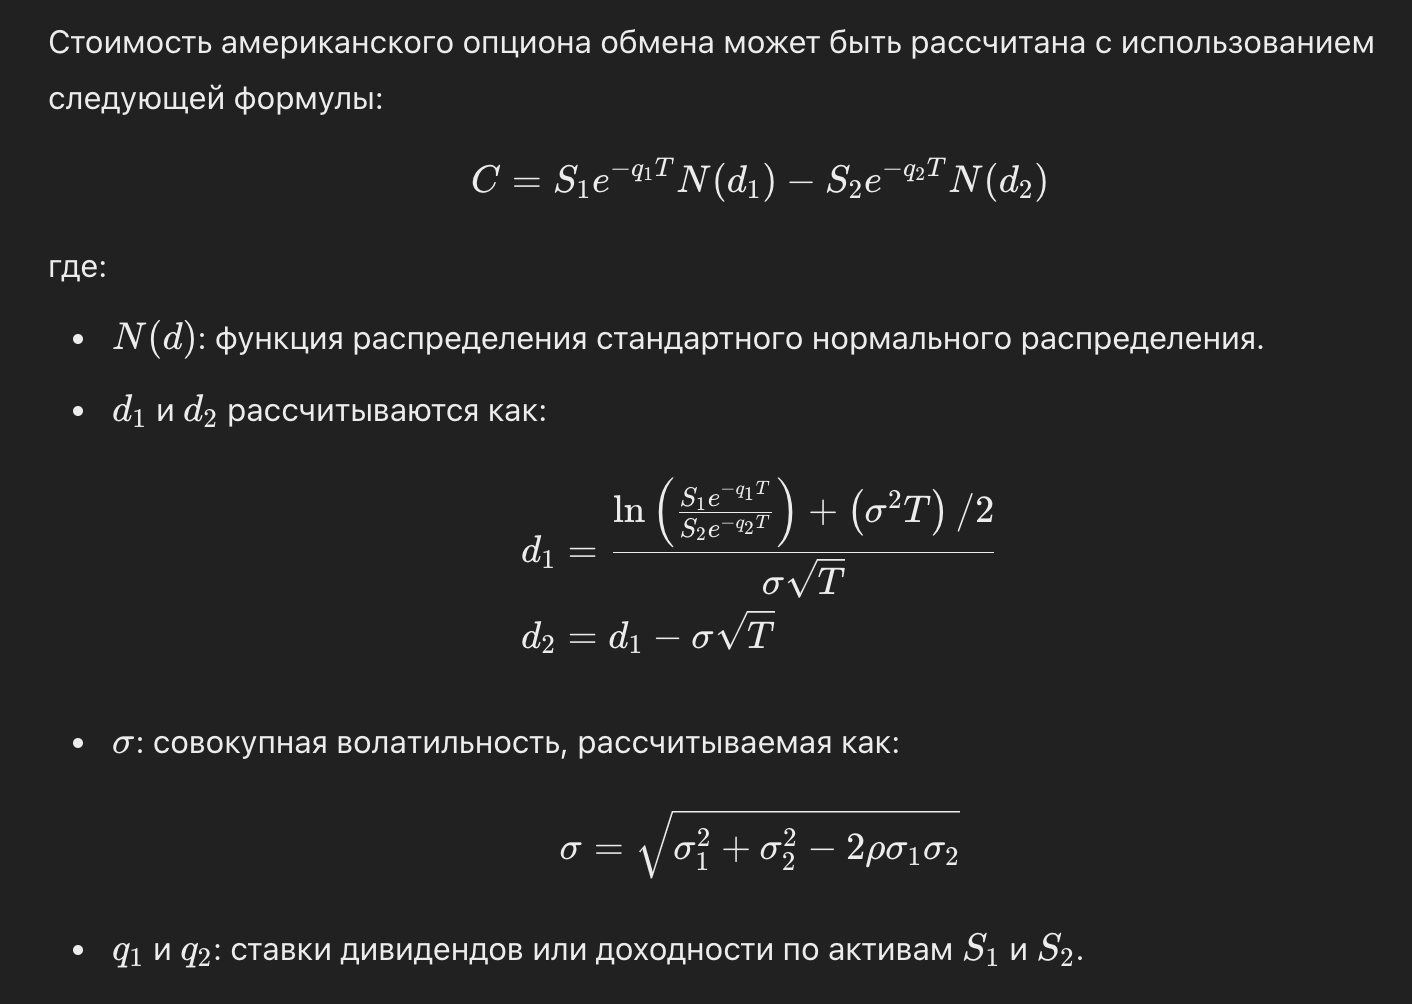

In [3]:
def american_exchange_option(S1, S2, sigma1, sigma2, rho, T, q1, q2):
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    return C


S1 = 100
S2 = 95
sigma1 = 0.2
sigma2 = 0.25
rho = 0.5
T = 1
q1 = 0.02
q2 = 0.03

option_price = american_exchange_option(S1, S2, sigma1, sigma2, rho, T, q1, q2)
print(f"–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞: ${option_price:.4f}")

–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞: $11.8954


–≠—Ç–æ—Ç —Ç–∏–ø –æ–ø—Ü–∏–æ–Ω–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º call –∏–ª–∏ put. –û–Ω –¥–∞—ë—Ç –ø—Ä–∞–≤–æ –æ–±–º–µ–Ω–∏–≤–∞—Ç—å –∞–∫—Ç–∏–≤—ã, –ø–æ—ç—Ç–æ–º—É —è–≤–ª—è–µ—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω—ã–º –≤–∏–¥–æ–º —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞. –ü–æ —Å–º—ã—Å–ª—É –æ–Ω –±–ª–∏–∂–µ –∫ call, –ø–æ—Å–∫–æ–ª—å–∫—É –≤–ª–∞–¥–µ–ª–µ—Ü –æ–ø—Ü–∏–æ–Ω–∞ –≤—ã–∏–≥—Ä—ã–≤–∞–µ—Ç, –µ—Å–ª–∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (
ùëÜ1) –≤—ã—à–µ –≤—Ç–æ—Ä–æ–≥–æ (ùëÜ2).

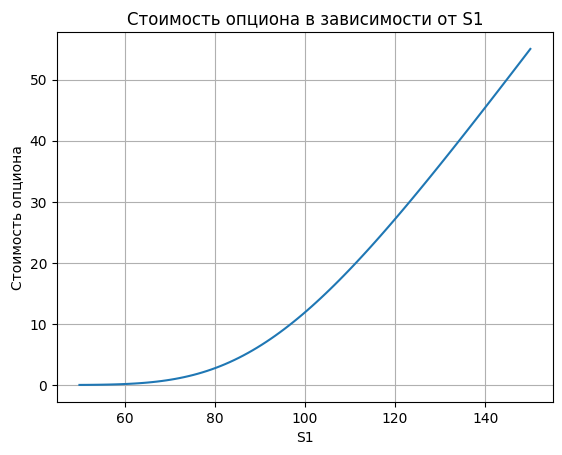

In [4]:
from scipy.special import erf
S1_values = np.linspace(50, 150, 100)
option_values = []

for S1 in S1_values:
    # –ü–æ–≤—Ç–æ—Ä—è–µ–º —Ä–∞—Å—á–µ—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è S1
    S2 = 95
    sigma1 = 0.2
    sigma2 = 0.25
    rho = 0.5
    T = 1
    q1 = 0.02
    q2 = 0.03
    
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values.append(C)

plt.plot(S1_values, option_values)
plt.title('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç S1')
plt.xlabel('S1')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞')
plt.grid(True)
plt.show()


–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ exchange-one-asset-for-another

–ì—Ä–∞—Ñ–∏–∫ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ —Ç–∏–ø–∞ "exchange-one-asset-for-another" –æ—Ç —Ü–µ–Ω—ã –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ \( S_1 \). 

## –û–ø–∏—Å–∞–Ω–∏–µ –æ–ø—Ü–∏–æ–Ω–∞
–û–ø—Ü–∏–æ–Ω "exchange-one-asset-for-another" –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø—Ä–∞–≤–æ –≤–ª–∞–¥–µ–ª—å—Ü—É –æ–±–º–µ–Ω—è—Ç—å –æ–¥–∏–Ω –∞–∫—Ç–∏–≤ (—Å —Ü–µ–Ω–æ–π \( S_1 \)) –Ω–∞ –¥—Ä—É–≥–æ–π –∞–∫—Ç–∏–≤ (—Å —Ü–µ–Ω–æ–π \( S_2 \)). –°—Ç–æ–∏–º–æ—Å—Ç—å —Ç–∞–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Ü–µ–Ω –∞–∫—Ç–∏–≤–æ–≤, –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏, –≤—Ä–µ–º–µ–Ω–∏ –¥–æ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –∏ –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.

## –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≥—Ä–∞—Ñ–∏–∫–∞
- **–û—Å—å X**: –¶–µ–Ω–∞ –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (\( S_1 \)).
- **–û—Å—å Y**: –°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞.

### –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ü—Ä–∏ –Ω–∏–∑–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö \( S_1 \), —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –±–ª–∏–∑–∫–∞ –∫ –Ω—É–ª—é, —Ç–∞–∫ –∫–∞–∫ –æ–±–º–µ–Ω —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –Ω–µ–≤—ã–≥–æ–¥–Ω—ã–º (\( S_1 < S_2 \)).
2. –° —Ä–æ—Å—Ç–æ–º \( S_1 \) —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, —Ç–∞–∫ –∫–∞–∫ –æ–±–º–µ–Ω —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–º –¥–ª—è –≤–ª–∞–¥–µ–ª—å—Ü–∞ (\( S_1 > S_2 \)).
3. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ—Ç \( S_1 \) –∏–º–µ–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä, —á—Ç–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–æ —Ä–æ—Å—Ç–æ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–µ–≤—ã—à–µ–Ω–∏—è \( S_1 > S_2 \).



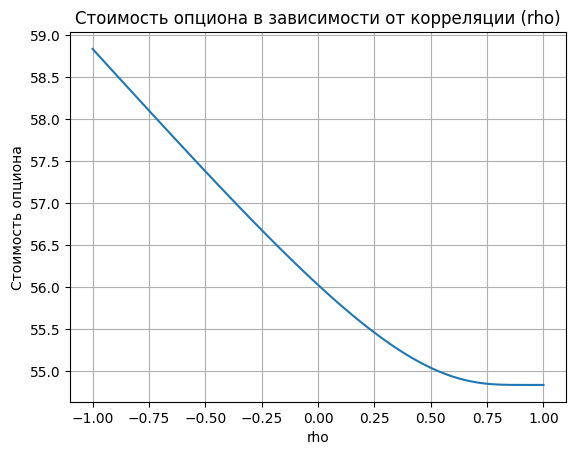

In [5]:
rho_values = np.linspace(-1, 1, 100)
option_values_rho = []

for rho in rho_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_rho.append(C)

plt.plot(rho_values, option_values_rho)
plt.title('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (rho)')
plt.xlabel('rho')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞')
plt.grid(True)
plt.show()


–ü—Ä–∏ –Ω–∏–∑–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ–ø—Ü–∏–æ–Ω—ã —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –±–æ–ª–µ–µ —Ü–µ–Ω–Ω—ã–º–∏, —Ç–∞–∫ –∫–∞–∫ —Ü–µ–Ω–∞ –∞–∫—Ç–∏–≤–æ–≤ –º–µ–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–∞.

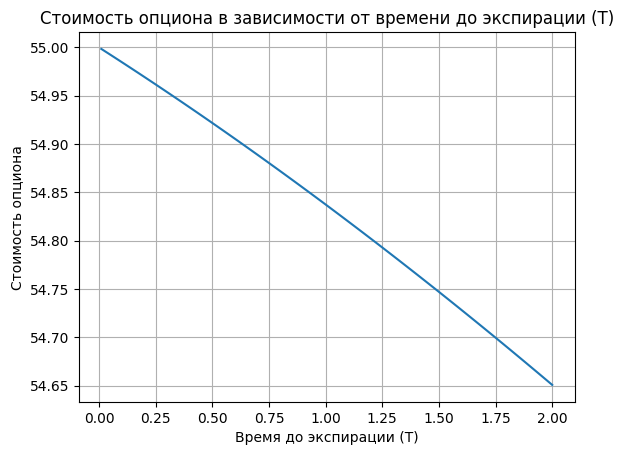

In [6]:
T_values = np.linspace(0.01, 2, 100)  # –í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ –æ—Ç 0.01 –¥–æ 2 –ª–µ—Ç
option_values_T = []

for T in T_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_T.append(C)

plt.plot(T_values, option_values_T)
plt.title('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)')
plt.xlabel('–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞')
plt.grid(True)
plt.show()

–≠—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ –æ—Ç—Ä–∞–∂–∞–µ—Ç, –∫–∞–∫ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –º–µ–Ω—è–µ—Ç—Å—è –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ –∏—Å—Ç–µ—á–µ–Ω–∏—è (\(T\)).


1. **–ß–µ–º –±–æ–ª—å—à–µ \(T\), —Ç–µ–º –≤—ã—à–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞**:
   - –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ –∏—Å—Ç–µ—á–µ–Ω–∏—è —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å (–≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å) —Ü–µ–Ω –∞–∫—Ç–∏–≤–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –æ–ø—Ü–∏–æ–Ω –±–æ–ª–µ–µ —Ü–µ–Ω–Ω—ã–º.
   - –£ –≤–ª–∞–¥–µ–ª—å—Ü–∞ –æ–ø—Ü–∏–æ–Ω–∞ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ–∂–¥–∞—Ç—å—Å—è –≤—ã–≥–æ–¥–Ω–æ–≥–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Ü–µ–Ω \(S_1\) –∏ \(S_2\).
2. **–°—Ç–æ–∏–º–æ—Å—Ç—å —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è, –µ—Å–ª–∏ \(T\) –±–ª–∏–∑–∏—Ç—Å—è –∫ –Ω—É–ª—é**:
   - –ö–æ–≥–¥–∞ \(T —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ 0\), –æ–ø—Ü–∏–æ–Ω —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø–æ—Ö–æ–∂ –Ω–∞ –Ω–µ–º–µ–¥–ª–µ–Ω–Ω—ã–π –æ–±–º–µ–Ω –∞–∫—Ç–∏–≤–æ–≤, –∏ –µ–≥–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ —Ä–∞–∑–Ω–∏—Ü–µ —Ç–µ–∫—É—â–∏—Ö —Ü–µ–Ω –∞–∫—Ç–∏–≤–æ–≤.


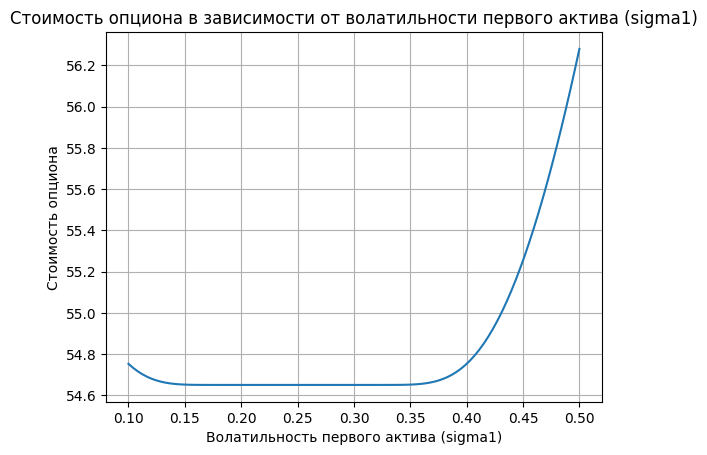

In [7]:
sigma1_values = np.linspace(0.1, 0.5, 100)  # –í–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –æ—Ç 0.1 –¥–æ 0.5
option_values_sigma1 = []

for sigma1 in sigma1_values:
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log((S1 * np.exp(-q1 * T)) / (S2 * np.exp(-q2 * T))) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    Nd2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    C = S1 * np.exp(-q1 * T) * Nd1 - S2 * np.exp(-q2 * T) * Nd2
    option_values_sigma1.append(C)

plt.plot(sigma1_values, option_values_sigma1)
plt.title('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (sigma1)')
plt.xlabel('–í–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (sigma1)')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞')
plt.grid(True)
plt.show()

–ì—Ä–∞—Ñ–∏–∫ –∏–ª–ª—é—Å—Ç—Ä–∏—Ä—É–µ—Ç, –∫–∞–∫ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ (\(\sigma_1\)) –ø–µ—Ä–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞.

1. **–ß–µ–º –≤—ã—à–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å (\(\sigma_1\)), —Ç–µ–º –≤—ã—à–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞**:
   - –ü–æ–≤—ã—à–µ–Ω–∏–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω —Ü–µ–Ω \(S_1\), —á—Ç–æ –¥–µ–ª–∞–µ—Ç –æ–ø—Ü–∏–æ–Ω –±–æ–ª–µ–µ —Ü–µ–Ω–Ω—ã–º (—É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã–≥–æ–¥–Ω–æ–≥–æ –æ–±–º–µ–Ω–∞ \(S_1 > S_2\)).
   - –í—ã—Å–æ–∫–∞—è –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å = –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –Ω–∞ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω.
2. **–ü—Ä–∏ –Ω–∏–∑–∫–æ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ (\(\sigma_1 \to 0\)) —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–∞ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è**:
   - –ï—Å–ª–∏ —Ü–µ–Ω–∞ –∞–∫—Ç–∏–≤–∞ –ø–æ—á—Ç–∏ —Å—Ç–∞–±–∏–ª—å–Ω–∞ (\(\sigma_1 \to 0\)), –æ–ø—Ü–∏–æ–Ω —Ç–µ—Ä—è–µ—Ç —Å–≤–æ—é –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —Ç–∞–∫ –∫–∞–∫ –µ–≥–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø–æ—á—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–æ–π –∏ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–π.